In [1]:
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
disease_list = df.SUBCLASS.unique()


In [2]:
#too many 변이, ROWs DELETE
for d in disease_list:
    td = df[df['SUBCLASS']==d].apply(lambda x : x!='WT').agg(sum , axis=1).sort_values(ascending=False) >= 706
    if td[td].sum()> 0:
        print(d, list(td[td].index))
        df.drop(list(td[td].index), inplace=True)
df

SKCM [1369, 6153, 486]
STES [601, 682, 2999]
BRCA [4228, 2707]
PAAD [1789]
UCEC [4757, 1761, 4984, 2189, 5049, 1202, 6140, 4098, 5683, 406, 71, 520]
COAD [4081, 1502, 3967, 2984]
DLBC [354]


,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [3]:
df_target = df['SUBCLASS']
data = df.drop(columns=['ID', 'SUBCLASS'])
df_test.drop(columns=['ID'], inplace=True)

In [4]:
data

,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,ABCA5,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,R895R,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [5]:
df_target

0        KIPAN
1         SARC
2         SKCM
3         KIRC
4       GBMLGG
         ...  
6196      LUAD
6197       LGG
6198      COAD
6199      TGCT
6200      SKCM
Name: SUBCLASS, Length: 6175, dtype: object

In [6]:
cdf2 = df.apply(lambda x : x =='WT').agg(sum)
cdf2 = cdf2[2:].reset_index(name='count')

cdf = df_test.apply(lambda x : x =='WT').agg(sum)
cdf = cdf[1:].reset_index(name='count')


cdf2 = cdf2.sort_values(by='count', ascending=False)
cdf = cdf.sort_values(by='count', ascending=False)

drop_g_list = cdf2[cdf2['count'] > df.shape[0]-15]['index'].values
drop_g_list2 = cdf[cdf['count'] > df_test.shape[0]-10]['index'].values

drop_genes =  set(list(drop_g_list) + list(drop_g_list2))
len(drop_genes)


995

In [7]:
diseaseList = df.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,784
1,KIPAN,515
2,GBMLGG,461
3,STES,376
4,KIRC,334
5,THCA,324
6,SKCM,273
7,PRAD,266
8,OV,253
9,LGG,229


In [29]:
##########

In [42]:
#각 유전자 별로 변이 있는 게 5미만 것들
selected_genes = set()
cdf = df_test.apply(lambda x : x =='WT').agg(sum)
cdf = cdf[1:].reset_index(name='count')
cdf


,index,count
0,AAAS,2516
1,AADAT,2522
2,AARS1,2506
3,ABAT,2506
4,ABCA1,2435
...,...,...
4378,ZNRF4,2460
4379,ZPBP,2501
4380,ZW10,2506
4381,ZWINT,2511


<Axes: >

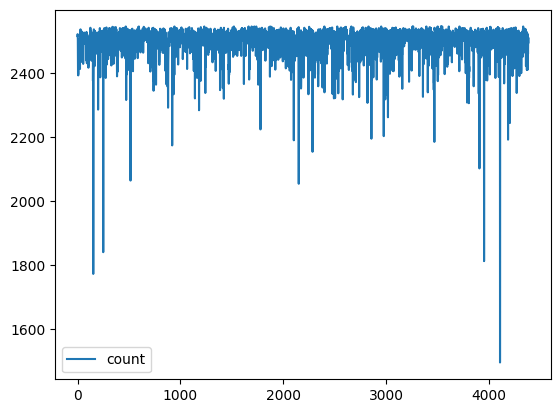

In [43]:
cdf.plot()

<Axes: >

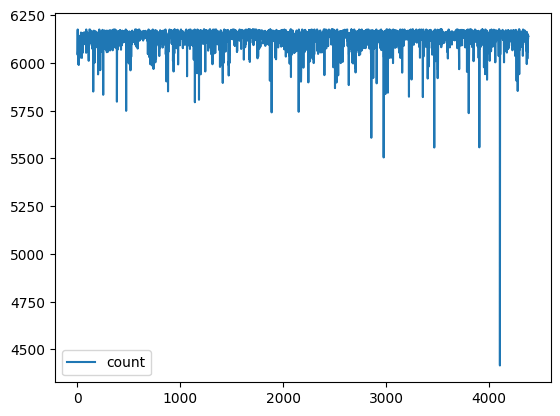

In [78]:
#각 유전자 별로 변이 있는 게 5미만 것들

cdf2 = df.apply(lambda x : x =='WT').agg(sum)
cdf2 = cdf2[2:].reset_index(name='count')
cdf2.plot()


In [88]:
cdf2 = cdf2.sort_values(by='count', ascending=False)
cdf = cdf.sort_values(by='count', ascending=False)
cdf


,index,count
2399,MIX23,2546
1692,GSTT2,2546
1737,HBBP1,2546
2951,PHB1,2546
4331,XIST,2546
...,...,...
2150,KMT2D,2054
250,APC,1840
3951,TCHH,1812
153,AHNAK,1772


In [91]:
cdf2[cdf2['count'] > df.shape[0]-5]

,index,count
2661,NHERF1,6175
3391,RIGI,6175
3541,SEPTIN4,6175
364,ATP5PD,6175
1738,HBBP1,6175
...,...,...
1532,GADD45A,6171
3545,SERP1,6171
1538,GALE,6171
3518,SDF2L1,6171


In [90]:
cdf[cdf['count'] > df_test.shape[0]-5]

,index,count
2399,MIX23,2546
1692,GSTT2,2546
1737,HBBP1,2546
2951,PHB1,2546
4331,XIST,2546
...,...,...
1423,FCER1G,2542
2801,OSTC,2542
736,CEBPG,2542
356,ATP5MC1,2542


In [47]:
cdf.sort_values(by='count', ascending=False)

,index,count
2399,MIX23,2546
1692,GSTT2,2546
1737,HBBP1,2546
2951,PHB1,2546
4331,XIST,2546
...,...,...
2150,KMT2D,2054
250,APC,1840
3951,TCHH,1812
153,AHNAK,1772


KIPAN 286
SARC 31
SKCM 1895
KIRC 68
GBMLGG 147
STES 1811
BRCA 548
THCA 4
LIHC 106
HNSC 334
PAAD 15
OV 47
PRAD 16
UCEC 402
LAML 9
COAD 541
ACC 51
LGG 16
LUSC 587
LUAD 468
CESC 175
PCPG 3
THYM 1
BLCA 209
TGCT 14
DLBC 12
2504


In [8]:
glist = set(df_test.columns) - drop_genes
len(glist)

3389

In [ ]:
def get_gene_list1():
    selected_genes = set()
    for d in disease_list:
        count_df = df[df.SUBCLASS==d].apply(lambda x : x!='WT').agg(sum)
        count_df = count_df[2:].reset_index(name='count')        
        gene_list = count_df[count_df['count']>5]['index'].values
        print(d, len(gene_list))
        selected_genes.update(gene_list)
    print(len(selected_genes))
    return selected_genes
glist = get_gene_list1()

In [9]:
total = pd.concat([data,df_test] ) #make_ndf(data, df_test)
f = lambda x : '' if x == 'WT' else x
total = total.map(f)
total = total.loc[:, list(glist)]
total

,CKB,MRAP,TMPRSS6,EPCAM,TOMM40,FADS1,PLXNB2,ABCA4,EGFR,RASA1,...,CUL4A,BIN1,CRLF1,MVK,CD74,PARP14,IL4I1,MYH1,KIF20A,OAS2
0,,,,,,,,,,,...,,,,,,,,,,
1,,,,,,,,,,,...,,,,,,,,,,
2,,,,,,,,,,,...,,,,,,,,,,
3,,,,,,,,,L838M,,...,,,,,,,,,,
4,,,,,,,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,,,,,,,,,,,...,,,,,,,,,,
2542,,,,,,,,,,,...,,,,,,,,,,
2543,,,A464A,,G192R,V383F,Y852C Y875C Y821C,G606D,M514T M567T M522T M300T,,...,A9A A109A,R127W R154W R130W,,,,S1610N,,,,
2544,,,,,,,,R1517H,,,...,,,,,,,,,,


In [10]:
#total.drop(columns=['TP53'], inplace=True)
#total

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for c in total.columns:
    total[c] = encoder.fit_transform(total[c])

In [12]:
nRows = df.shape[0]
df = total[:nRows]
df_test = total[nRows:]



In [13]:
df

,CKB,MRAP,TMPRSS6,EPCAM,TOMM40,FADS1,PLXNB2,ABCA4,EGFR,RASA1,...,CUL4A,BIN1,CRLF1,MVK,CD74,PARP14,IL4I1,MYH1,KIF20A,OAS2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,143,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_test

,CKB,MRAP,TMPRSS6,EPCAM,TOMM40,FADS1,PLXNB2,ABCA4,EGFR,RASA1,...,CUL4A,BIN1,CRLF1,MVK,CD74,PARP14,IL4I1,MYH1,KIF20A,OAS2
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,143,0,0
1,0,0,102,0,0,0,0,0,0,0,...,0,28,0,2,0,0,39,0,43,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2543,0,0,10,0,7,35,264,95,151,0,...,7,48,0,0,0,138,0,0,0,0
2544,0,0,0,0,0,0,0,200,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder
X = df
y = df_target
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)
y


array([ 8, 19, 20, ...,  4, 22, 20])

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state=156)#shuffle=False,
print(X_train.shape, X_test.shape)

(4322, 3389) (1853, 3389)


In [17]:
dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)


#Multi-class classification

In [18]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    'num_class': 26
}
num_boost_round = 50

dtrain = xgb.DMatrix(data = X_train, label= y_train)
dtest = xgb.DMatrix(data = X_test, label = y_test)
model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_boost_round, early_stopping_rounds=5, 
                  evals=[(dtrain, 'train'), (dtest, 'valid')],
                  verbose_eval=2)

[0]	train-mlogloss:2.60544	valid-mlogloss:2.70777
[2]	train-mlogloss:2.20573	valid-mlogloss:2.45249
[4]	train-mlogloss:1.97045	valid-mlogloss:2.33147
[6]	train-mlogloss:1.80675	valid-mlogloss:2.26380
[8]	train-mlogloss:1.68473	valid-mlogloss:2.22646
[10]	train-mlogloss:1.58876	valid-mlogloss:2.19785
[12]	train-mlogloss:1.51121	valid-mlogloss:2.18310
[14]	train-mlogloss:1.44817	valid-mlogloss:2.16922
[16]	train-mlogloss:1.39206	valid-mlogloss:2.15756
[18]	train-mlogloss:1.34598	valid-mlogloss:2.15346
[20]	train-mlogloss:1.30416	valid-mlogloss:2.14725
[22]	train-mlogloss:1.26505	valid-mlogloss:2.14382
[24]	train-mlogloss:1.22941	valid-mlogloss:2.14001
[26]	train-mlogloss:1.19660	valid-mlogloss:2.13974
[28]	train-mlogloss:1.16745	valid-mlogloss:2.13913
[30]	train-mlogloss:1.14083	valid-mlogloss:2.14019
[32]	train-mlogloss:1.11656	valid-mlogloss:2.13902
[34]	train-mlogloss:1.09241	valid-mlogloss:2.13925
[36]	train-mlogloss:1.07068	valid-mlogloss:2.13995


In [19]:
params = {
    'tree_method': 'approx',
    'objective': 'multi:softprob',
    #'learning_rate': 0.05
}
num_boost_round = 200

clf = xgb.XGBClassifier( 
                        n_estimators=100,        # 부스팅 단계 수
                        max_depth=6,             # 개별 트리의 최대 깊이
                        learning_rate=0.1,       # 학습률, 낮출수록 느리게 학습하지만 성능 개선 가능
                        subsample=0.8,           # 각 부스팅 단계에서 사용할 샘플의 비율
                        colsample_bytree=0.8,    # 각 트리에서 사용할 특성의 비율
                        random_state=42,         # 랜덤 시드
                        n_jobs=-1 ,               # 모든 CPU 코어 사용,
                        early_stopping_rounds=5,
                        **params)#n_estimators=num_boost_round,early_stopping_rounds=5,
clf.fit(X_train, y_train, 
        eval_set=[(X_train, y_train), (X_test,y_test)],
        verbose=2);

[0]	validation_0-mlogloss:3.07368	validation_1-mlogloss:3.10021
[2]	validation_0-mlogloss:2.80890	validation_1-mlogloss:2.88339
[4]	validation_0-mlogloss:2.62166	validation_1-mlogloss:2.73882
[6]	validation_0-mlogloss:2.47436	validation_1-mlogloss:2.63297
[8]	validation_0-mlogloss:2.35288	validation_1-mlogloss:2.54998
[10]	validation_0-mlogloss:2.25705	validation_1-mlogloss:2.49280
[12]	validation_0-mlogloss:2.17036	validation_1-mlogloss:2.43900
[14]	validation_0-mlogloss:2.09291	validation_1-mlogloss:2.39278
[16]	validation_0-mlogloss:2.02449	validation_1-mlogloss:2.35523
[18]	validation_0-mlogloss:1.96262	validation_1-mlogloss:2.32372
[20]	validation_0-mlogloss:1.90858	validation_1-mlogloss:2.29800
[22]	validation_0-mlogloss:1.85810	validation_1-mlogloss:2.27519
[24]	validation_0-mlogloss:1.81286	validation_1-mlogloss:2.25599
[26]	validation_0-mlogloss:1.77208	validation_1-mlogloss:2.23767
[28]	validation_0-mlogloss:1.73280	validation_1-mlogloss:2.22372
[30]	validation_0-mlogloss:1.6

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 정의
model = Sequential()

# 입력층과 첫 번째 은닉층
model.add(Dense(units=64, input_dim=2000, activation='relu'))  # 2000개의 속성 사용
# 두 번째 은닉층
model.add(Dense(units=32, activation='relu'))
# 출력층 (이진 분류일 경우)
model.add(Dense(units=1, activation='sigmoid'))

# 모델 컴파일
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
#model.fit(X_train, y_train, epochs=50, batch_size=32)


In [20]:
y_true = y_test
y_pred = clf.predict(X_test)
y_score = clf.predict_proba(X_test)
y_true.shape, y_pred.shape, y_score.shape

((1853,), (1853,), (1853, 26))

In [22]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3351322180248246

In [21]:
from sklearn import metrics 
metrics.accuracy_score(y_true, y_pred)

0.3378305450620615

In [23]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.55      0.17      0.26        35
           2       0.28      0.74      0.40       228
           3       0.22      0.03      0.06        58
           4       0.54      0.61      0.58        62
           5       0.20      0.12      0.15         8
           6       0.33      0.33      0.33       133
           7       0.29      0.16      0.20        64
           8       0.19      0.22      0.21       142
           9       0.12      0.09      0.10        86
          10       0.67      0.47      0.55        43
          11       0.30      0.31      0.31        77
          12       0.26      0.15      0.19        48
          13       0.30      0.11      0.16        55
          14       0.19      0.11      0.14        44
          15       0.24      0.41      0.31        78
          16       0.07      0.03      0.04        36
          17       0.21    

In [24]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8611534664901727

In [23]:
metrics.roc_auc_score(y_true, y_score, average='weighted', multi_class='ovr')

0.8444533281284329

In [25]:
clf.predict(df_test)

array([21,  3,  2, ...,  8, 10,  6])

In [26]:
res = clf.predict(df_test)



In [27]:
res = encoder2.inverse_transform(res)

In [28]:

df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df


,ID,SUBCLASS
0,TEST_0000,STES
1,TEST_0001,CESC
2,TEST_0002,BRCA
3,TEST_0003,LGG
4,TEST_0004,STES
...,...,...
2541,TEST_2541,COAD
2542,TEST_2542,HNSC
2543,TEST_2543,KIPAN
2544,TEST_2544,LAML


In [29]:
res_df.to_csv('submit.csv',index = False)

In [97]:
pred_probs = xgb_model.predict(dtest)


NameError: name 'xgb_model' is not defined

In [ ]:
import numpy as np
print(np.round(pred_probs[:10], 3))


In [58]:
preds= [round(x) if x > 0 else 0 for x in pred_probs]

In [ ]:
preds

In [60]:
for p in preds:
    if p<0:
        print(p)


In [ ]:
encoder.inverse_transform(preds)

In [35]:
model = RandomForestClassifier(
            n_estimators=50, ## 붓스트랩 샘플 개수 또는 base_estimator 개수
            criterion='entropy', ## 불순도 측도
            max_depth=65, ## 개별 나무의 최대 깊이
            #max_features='sqrt', ## 매 분리시 랜덤으로 뽑을 변수 개수
            #max_samples=1.0, ## 붓스트랩 샘플 비율 => 1이면 학습데이터를 모두 샘플링한다.
            #bootstrap=True, ## 복원 추출,  False이면 비복원 추출
            oob_score=True, ## Out-of-bag 데이터를 이용한 성능 계산
            random_state=100
).fit(X,y)


In [ ]:
## 예측
print(model.predict(X)[:3]) 
print()


In [ ]:
X[:3]

In [ ]:
## 성능 평가
print(model.oob_score_) ## Out-of-bag 성능 평가 점수
print('정확도 : ', model.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()
## 변수 중요도
print(model.feature_importances_)




In [ ]:
## 성능 평가
print(model.oob_score_) ## Out-of-bag 성능 평가 점수
print('정확도 : ', model.score(X,y)) ## 테스트 성능 평가 점수(Accuracy)
print()
## 변수 중요도
print(model.feature_importances_)




In [ ]:
res = model.predict(df_test)
res

In [ ]:
res = model.predict(df_test)
res

In [ ]:
df_test1 = pd.read_csv('test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res})
res_df



In [24]:
res_df.to_csv('res04.csv',index = False)

In [ ]:
df[df.SUBCLASS == 'BRCA'].sum().sort_values(ascending=False).str.replace('WT','')

In [ ]:
df[df['SUBCLASS']=='DLBC']

In [ ]:
import numpy as np 
dfs = df[df['SUBCLASS']=='DLBC']
dfs.columns

In [ ]:
for c in dfs.columns:
    dfs[c] = np.where(dfs[c] == 'WT', 0, 1)
dfs

    

In [ ]:
dfs = df[df['SUBCLASS']=='DLBC']
dfs.apply(lambda x: x(if x=='WT' else x=1))

In [ ]:
for  x in df.iloc[0]:
    if x != 'WT': print(x)


In [ ]:
len(df_test.columns)

In [ ]:
len(df_test)

In [ ]:
df.colu